Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.head())

country country_long                      name   gppd_idnr  capacity_mw  \
0  IND     India        ACME Solar Tower          WRI1020239  2.5           
1  IND     India        ADITYA CEMENT WORKS       WRI1019881  98.0          
2  IND     India        AES Saurashtra Windfarms  WRI1026669  39.2          
3  IND     India        AGARTALA GT               IND0000001  135.0         
4  IND     India        AKALTARA TPP              IND0000002  1800.0        

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0  28.1839   73.2407    Solar        NaN         NaN        NaN            
1  24.7663   74.6090    Coal         NaN         NaN        NaN            
2  21.9038   69.3732    Wind         NaN         NaN        NaN            
3  23.8712   91.3602    Gas          NaN         NaN        NaN            
4  21.9603   82.4091    Coal         Oil         NaN        NaN            

   commissioning_year                 owner  \
0  2011.0              Solar Paces            
1 NaN                  Ultratech Cement ltd   
2 NaN                  AES                    
3  2004.0              NaN                    
4  2015.0              NaN                    

                                 source  \
0  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                   
2  CDM                                    
3  Central Electricity Authority          
4  Central Electricity Authority          

                                                                   url  \
0  http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262   
1  http://www.ultratechcement.com/                                       
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view          
3  http://www.cea.nic.in/                                                
4  http://www.cea.nic.in/                                                

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory NaN      NaN                      
1  WRI                                  NaN      NaN                      
2  WRI                                  NaN      NaN                      
3  WRI                                  NaN       2019.0                  
4  WRI                                  NaN       2019.0                  

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0 NaN                  NaN                  NaN                    
1 NaN                  NaN                  NaN                    
2 NaN                  NaN                  NaN                    
3 NaN                   617.789264           843.747               
4 NaN                   3035.550000          5916.370              

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0 NaN                  NaN                  NaN                    
1 NaN                  NaN                  NaN                    
2 NaN                  NaN                  NaN                    
3  886.004428           663.774500           626.239128            
4  6243.000000          5385.579736          7279.000000           

   generation_gwh_2019         generation_data_source  \
0 NaN                   NaN                             
1 NaN                   NaN                             
2 NaN                   NaN                             
3 NaN                   Central Electricity Authority   
4 NaN                   Central Electricity Authority   

   estimated_generation_gwh  
0 NaN                        
1 NaN                        
2 NaN                        
3 NaN                        
4 NaN

In [3]:
df.shape

(907, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [19]:
'country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'

array(['India'], dtype=object)

In [6]:
for i in df.columns:
    print(i,df[i].unique(),df[i].nunique())
    print('\n')

country ['IND'] 1


country_long ['India'] 1


name ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'BAGALKOT ICP'
 'BAGLIHAR HEP' 'BAGLIHAR HEP-II' 'BAIRA SIUL' 'BAKR

In [17]:
df_need_to_impute.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count  907.000000   861.000000  861.000000  527.000000           
mean   326.223755   21.197918   77.464907   1997.091082          
std    590.085456   6.239612    4.939316    17.082868            
min    0.000000     8.168900    68.644700   1927.000000          
25%    16.725000    16.773900   74.256200   1988.000000          
50%    59.200000    21.780000   76.719500   2001.000000          
75%    385.250000   25.512400   79.440800   2012.000000          
max    4760.000000  34.649000   95.408000   2018.000000          

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count  398.000000           422.000000           434.000000            
mean   2431.823590          2428.226946          2467.936859           
std    4026.440035          4194.596959          4162.884308           
min    0.000000             0.000000             0.000000              
25%    223.557672           176.381063           188.285252            
50%    801.123775           711.181225           737.205450            
75%    3035.306250          3084.121250          3282.861313           
max    28127.000000         30539.000000         30015.000000          

       generation_gwh_2017  generation_gwh_2018  
count  440.000000           448.000000           
mean   2547.759305          2600.804099          
std    4196.991169          4314.880456          
min    0.000000             0.000000             
25%    177.874930           193.378250           
50%    817.977250           751.644375           
75%    3275.690475          3143.535900          
max    35116.000000         35136.000000

In [7]:
df_need_to_impute = df.drop(['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [18]:
[i for i in df_need_to_impute.columns if df[i].isnull().sum()>0]

['latitude',
 'longitude',
 'other_fuel1',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_data_source']

In [19]:
df_need_to_impute.select_dtypes(exclude=['int64']).columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [20]:
df_need_to_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             198 non-null    object 
 5   commissioning_year      527 non-null    float64
 6   owner                   342 non-null    object 
 7   source                  907 non-null    object 
 8   url                     907 non-null    object 
 9   geolocation_source      888 non-null    object 
 10  generation_gwh_2014     398 non-null    float64
 11  generation_gwh_2015     422 non-null    float64
 12  generation_gwh_2016     434 non-null    float64
 13  generation_gwh_2017     440 non-null    float64
 14  generation_gwh_2018     448 non-null    fl

In [21]:
Missing_Data = ['latitude', 'longitude', 'other_fuel1', 'commissioning_year', 'owner', 'geolocation_source', 'generation_gwh_2014',
 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source']

In [22]:
for i in Missing_Data:
    df_need_to_impute[i] = df_need_to_impute[i].fillna(df_need_to_impute[i].dropna().mode()[0])

In [23]:
[i for i in df_need_to_impute.columns if df_need_to_impute[i].isnull().sum()>0]

[]

In [24]:
[i for i in df_need_to_impute.columns if df_need_to_impute[i].isnull().sum()>0]

[]

In [25]:
df_need_to_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             907 non-null    object 
 5   commissioning_year      907 non-null    float64
 6   owner                   907 non-null    object 
 7   source                  907 non-null    object 
 8   url                     907 non-null    object 
 9   geolocation_source      907 non-null    object 
 10  generation_gwh_2014     907 non-null    float64
 11  generation_gwh_2015     907 non-null    float64
 12  generation_gwh_2016     907 non-null    float64
 13  generation_gwh_2017     907 non-null    float64
 14  generation_gwh_2018     907 non-null    fl

In [26]:
df_need_to_impute['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas        69 
Biomass    50 
Oil        20 
Nuclear    9  
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

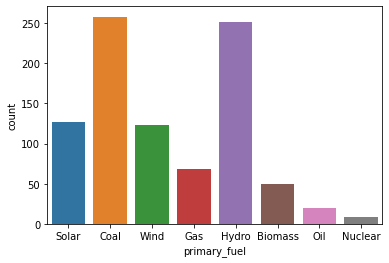

In [38]:
sns.countplot(df_need_to_impute.primary_fuel)

In [43]:
df_need_to_impute.select_dtypes(exclude=['int64']).columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [46]:
df_category = df_need_to_impute[['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source']]

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

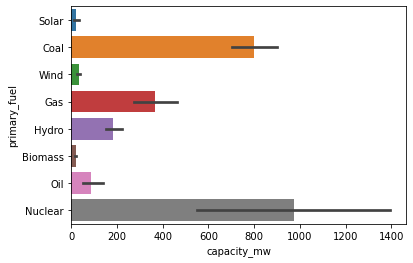

In [153]:
sns.barplot(x='capacity_mw',y='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

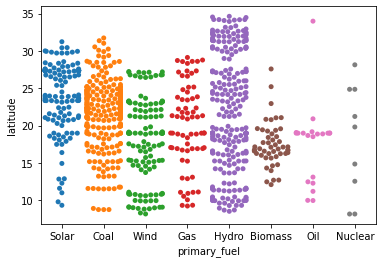

In [84]:
sns.swarmplot(y='latitude',x='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

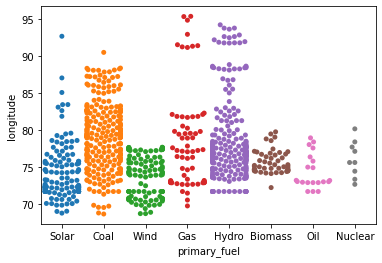

In [85]:
sns.swarmplot(y='longitude',x='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='other_fuel1', ylabel='primary_fuel'>

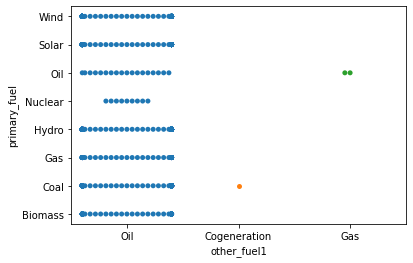

In [86]:
sns.swarmplot(x='other_fuel1',y='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

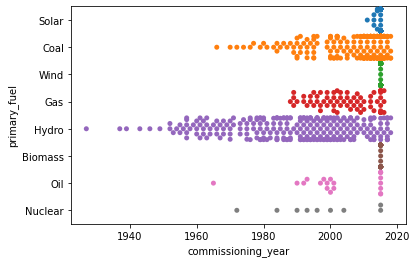

In [89]:
sns.swarmplot(x='commissioning_year',y='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='source'>

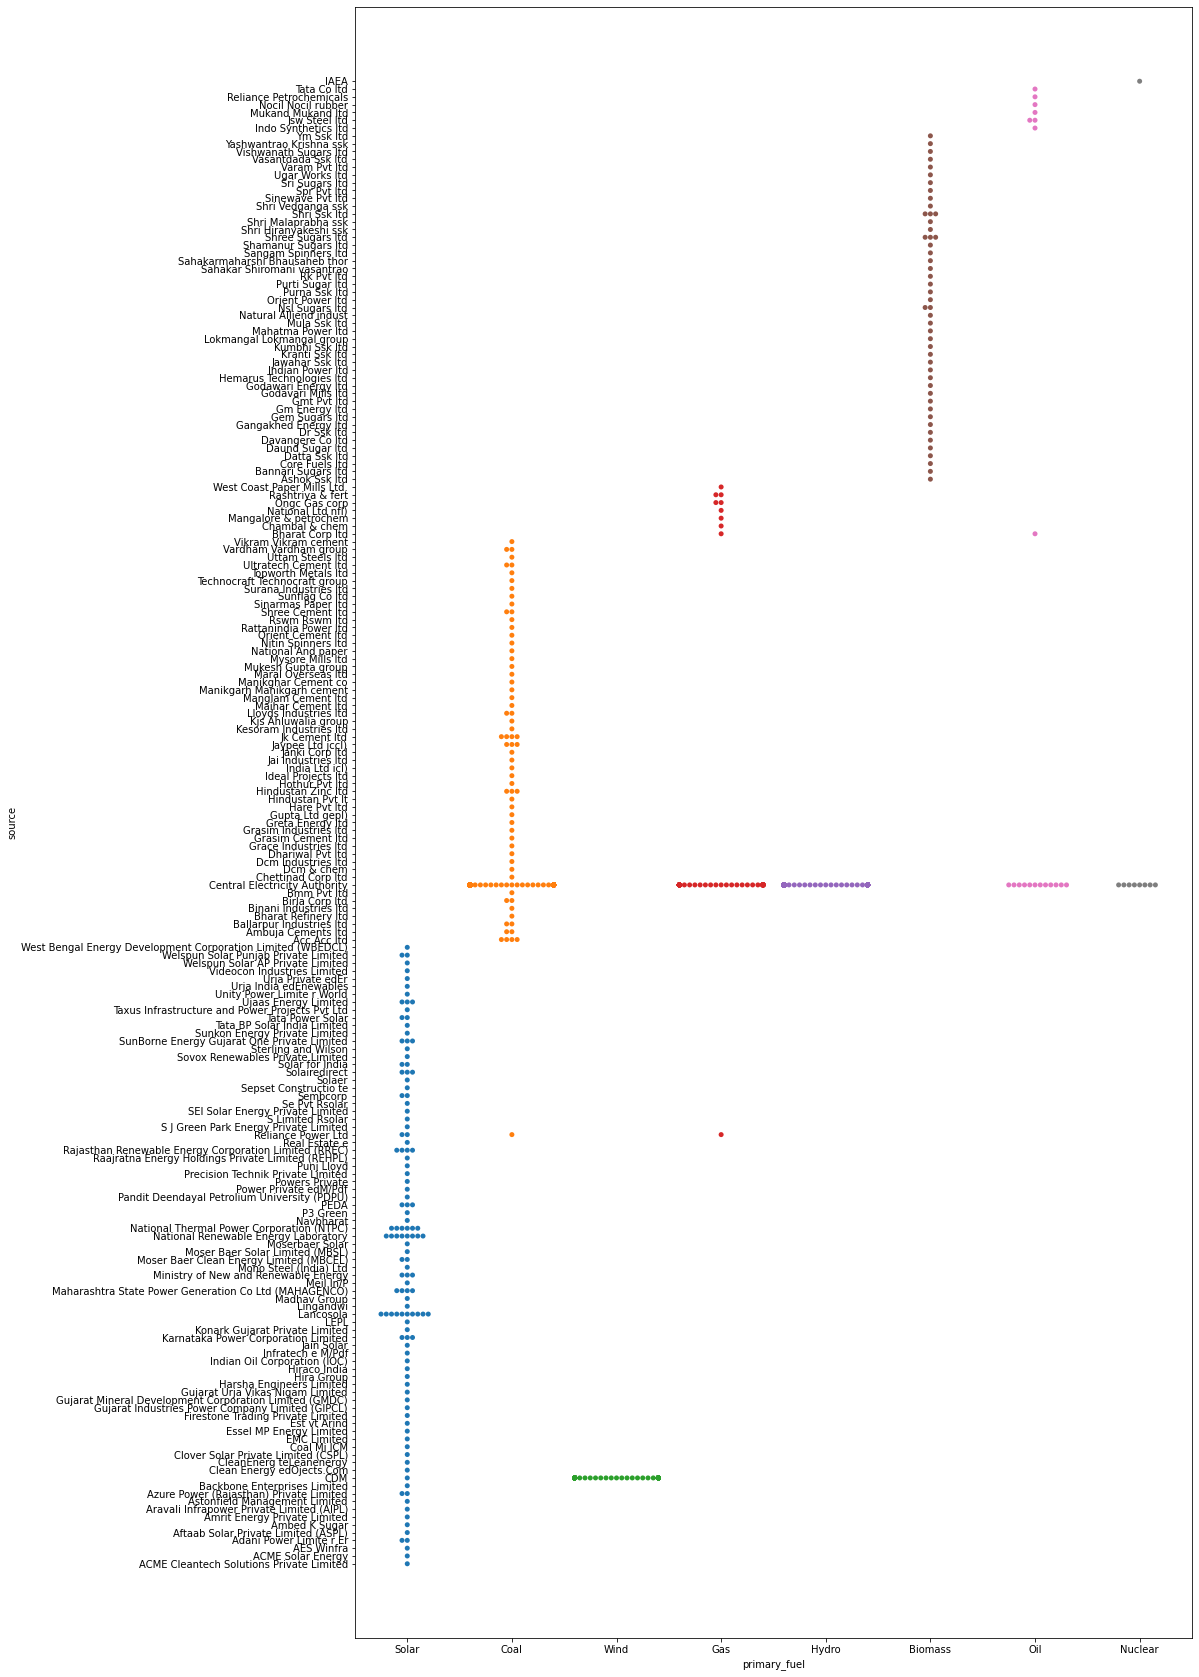

In [113]:
plt.figure(figsize=(15,30))
sns.swarmplot(y='source',x='primary_fuel',data=df_need_to_impute)

Text(0.5, 1.0, 'source')

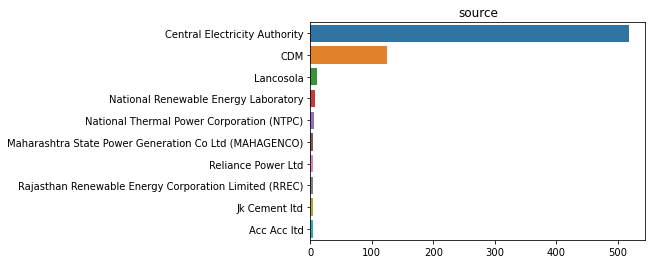

In [134]:
source = df_need_to_impute['source'].value_counts().head(10)
sns.barplot(source.values,source.index,palette='tab10')
plt.title('source')

<AxesSubplot:xlabel='primary_fuel', ylabel='owner'>

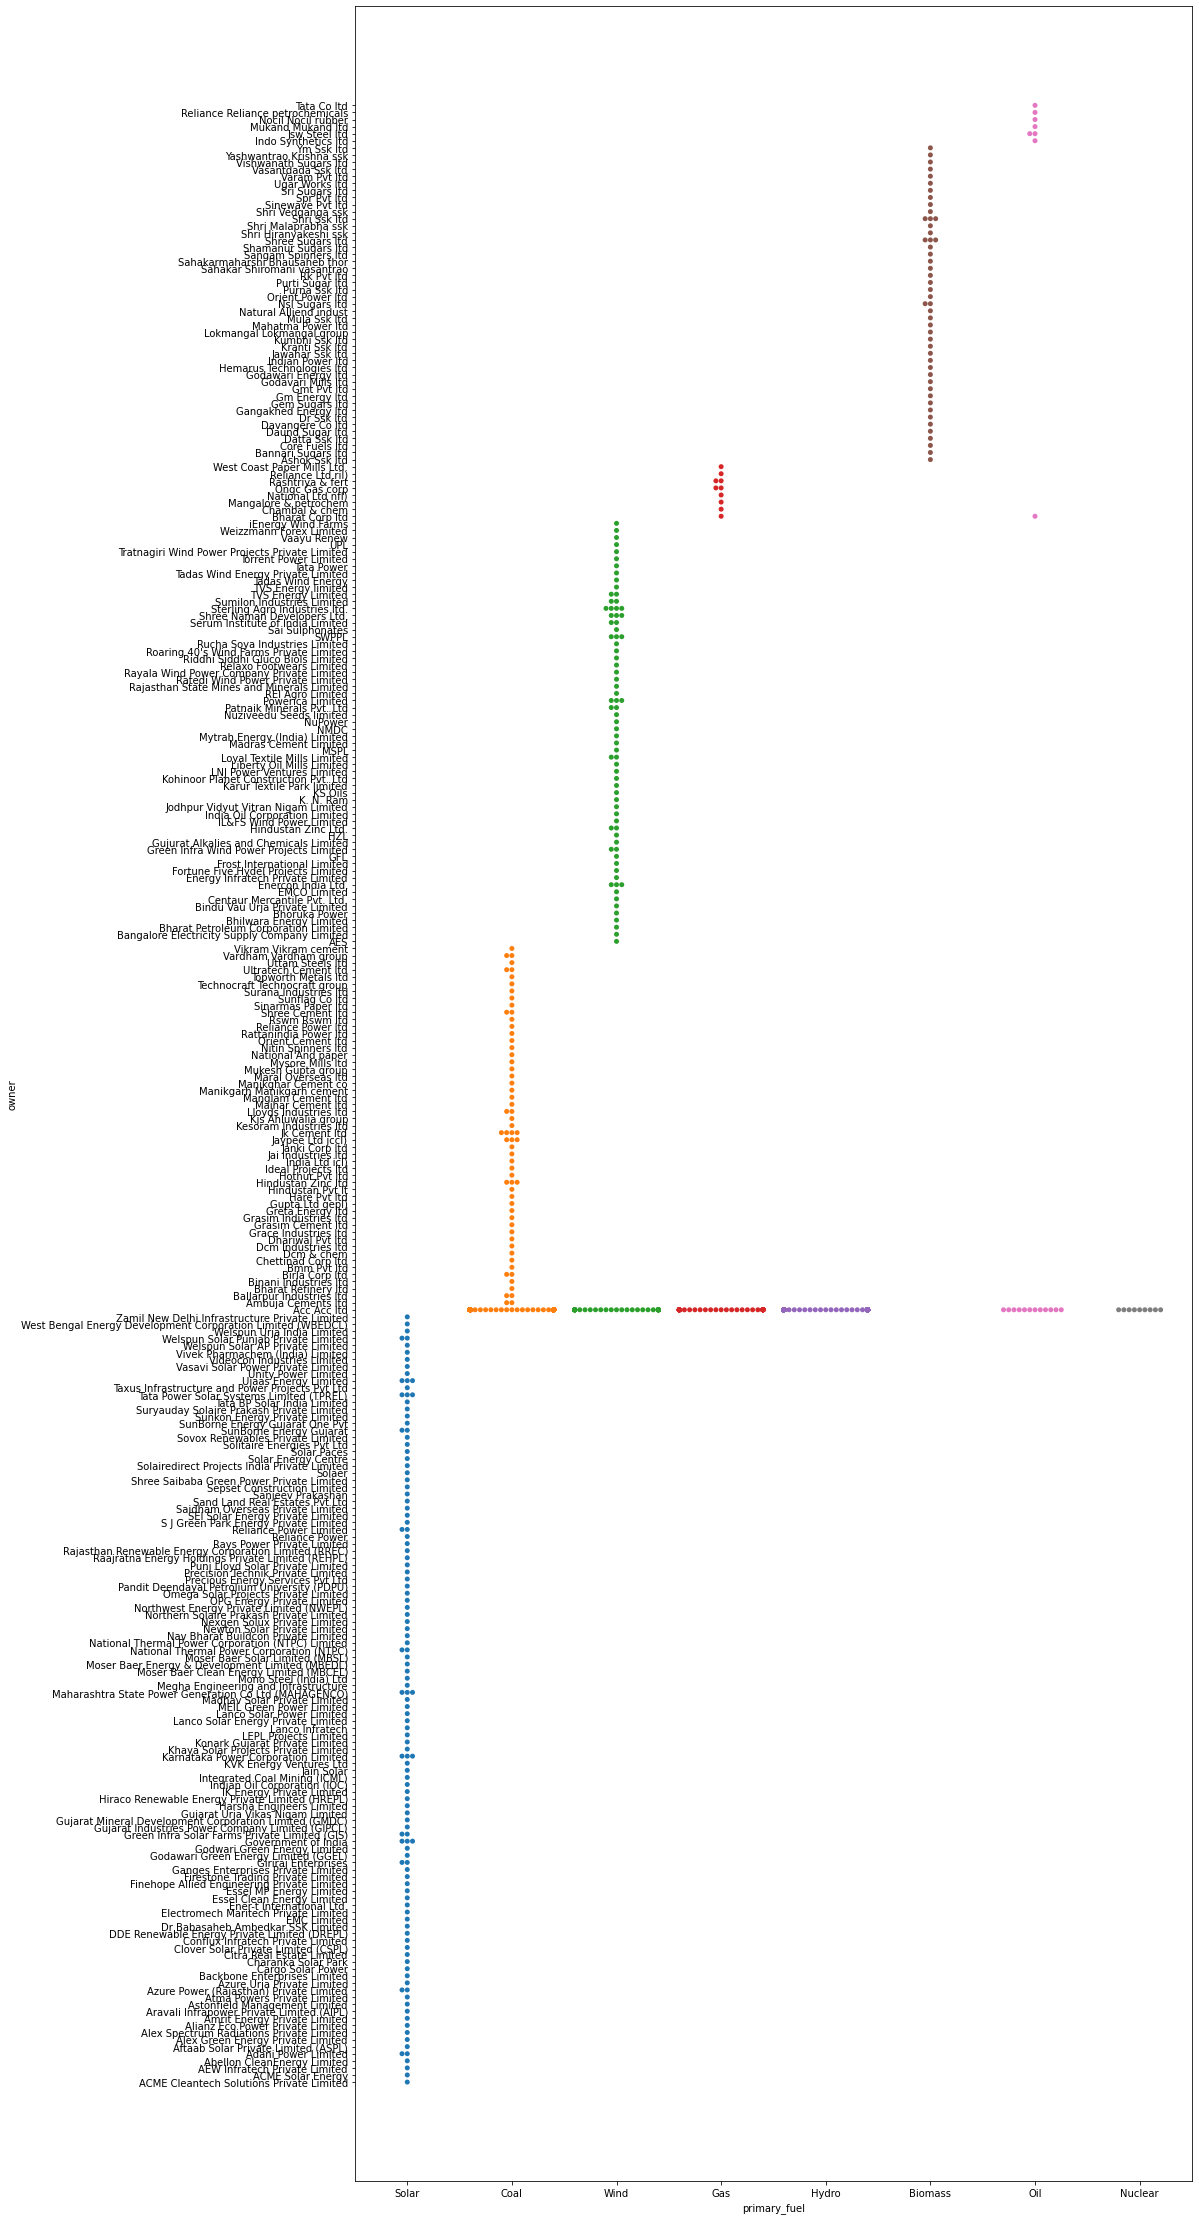

In [116]:
plt.figure(figsize=(15,40))
sns.swarmplot(y='owner',x='primary_fuel',data=df_need_to_impute.sort_values)

Text(0.5, 1.0, 'owner')

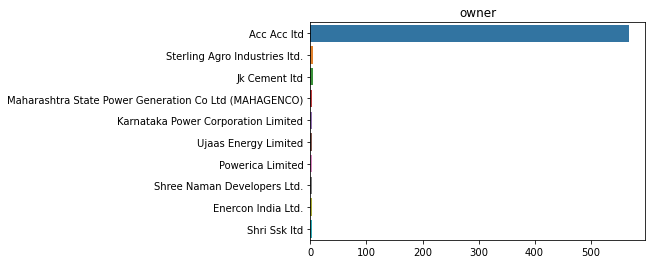

In [135]:
owner = df_need_to_impute['owner'].value_counts().head(10)
sns.barplot(owner.values,owner.index,palette='tab10')
plt.title('owner')

Text(0.5, 1.0, 'url')

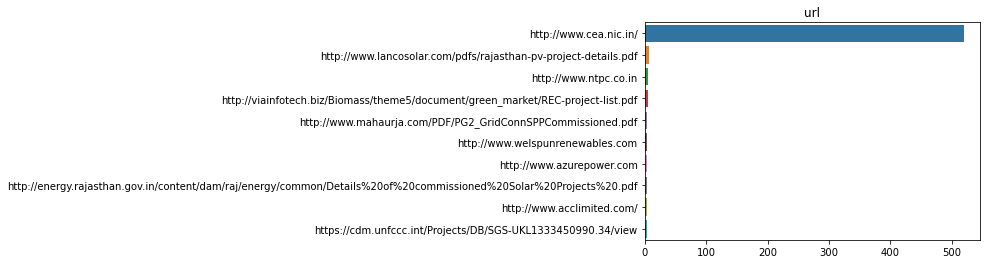

In [136]:
url = df_need_to_impute['url'].value_counts().head(10)
sns.barplot(url.values,url.index,palette='tab10')
plt.title('url')

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

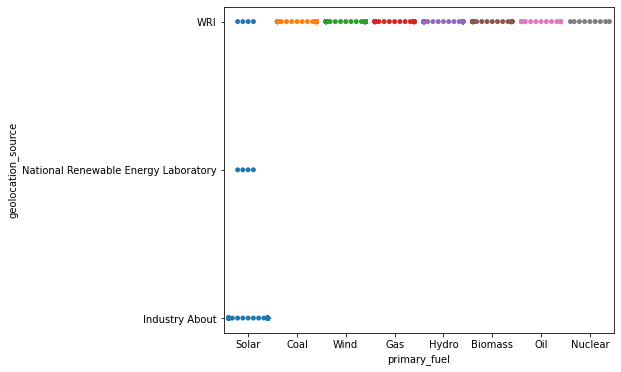

In [139]:
plt.figure(figsize=(7,6))
sns.swarmplot(y='geolocation_source',x='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

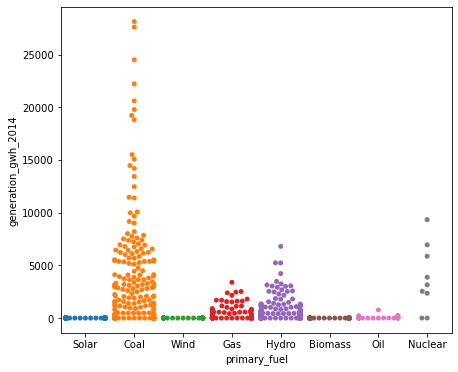

In [140]:
plt.figure(figsize=(7,6))
sns.swarmplot(y='generation_gwh_2014',x='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

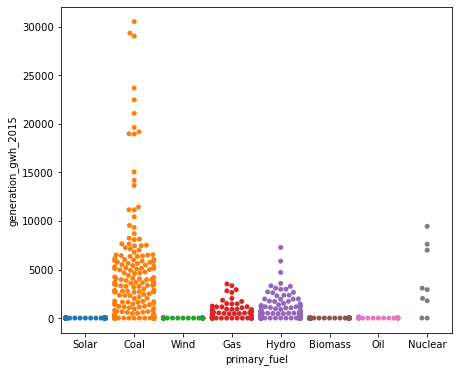

In [141]:
plt.figure(figsize=(7,6))
sns.swarmplot(y='generation_gwh_2015',x='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

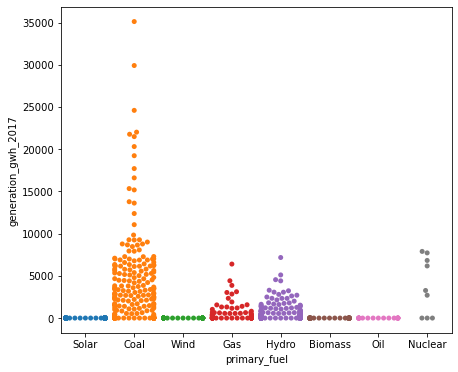

In [143]:
plt.figure(figsize=(7,6))
sns.swarmplot(y='generation_gwh_2017',x='primary_fuel',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_data_source'>

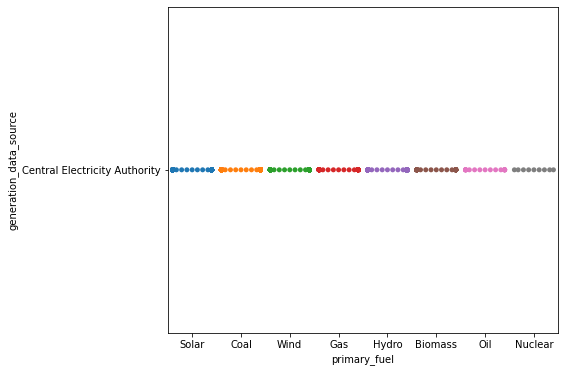

In [152]:
plt.figure(figsize=(7,6))
sns.swarmplot(y='generation_data_source',x='primary_fuel',data=df_need_to_impute)

In [41]:
df_need_to_impute.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

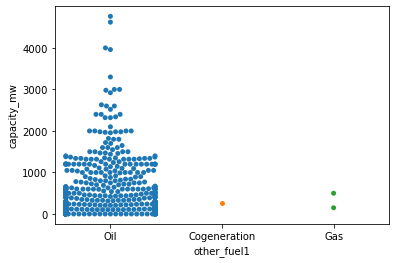

In [159]:
sns.swarmplot(x='other_fuel1',y='capacity_mw',data=df_need_to_impute)

<AxesSubplot:xlabel='capacity_mw', ylabel='source'>

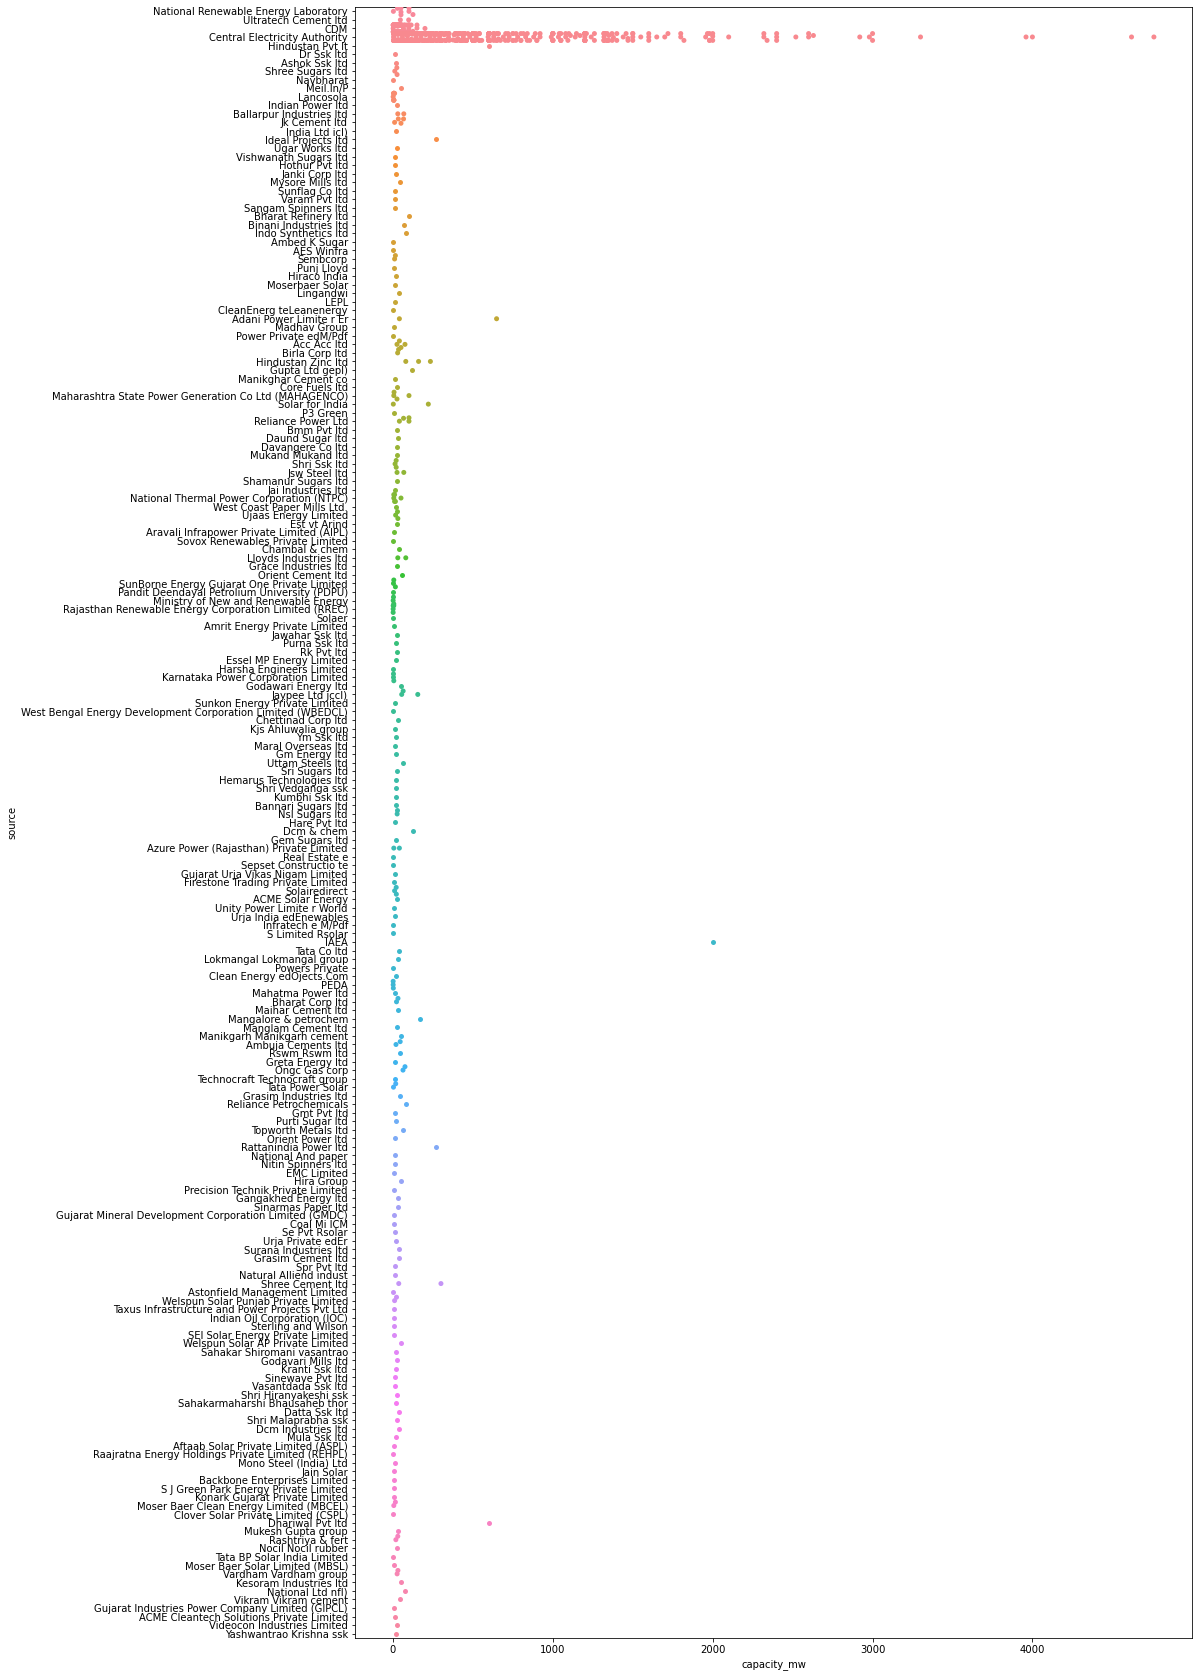

In [161]:
plt.figure(figsize=(15,30))
sns.swarmplot(y='source',x='capacity_mw',data=df_need_to_impute)

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

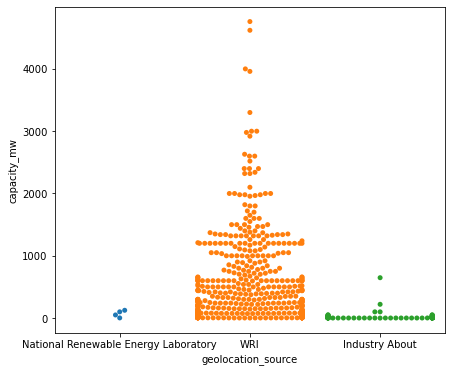

In [164]:
plt.figure(figsize=(7,6))
sns.swarmplot(x='geolocation_source',y='capacity_mw',data=df_need_to_impute)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

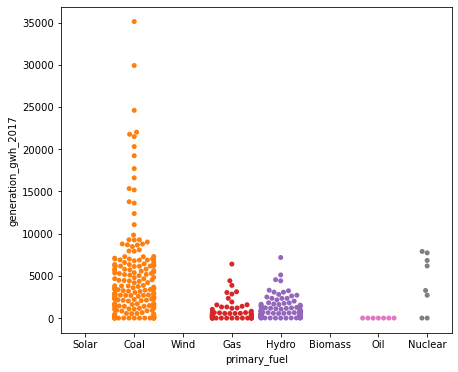

In [15]:
plt.figure(figsize=(7,6))
sns.swarmplot(y='generation_gwh_2017',x='primary_fuel',data=df_need_to_impute)

In [13]:
df_need_to_impute.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count  907.000000   861.000000  861.000000  527.000000           
mean   326.223755   21.197918   77.464907   1997.091082          
std    590.085456   6.239612    4.939316    17.082868            
min    0.000000     8.168900    68.644700   1927.000000          
25%    16.725000    16.773900   74.256200   1988.000000          
50%    59.200000    21.780000   76.719500   2001.000000          
75%    385.250000   25.512400   79.440800   2012.000000          
max    4760.000000  34.649000   95.408000   2018.000000          

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count  398.000000           422.000000           434.000000            
mean   2431.823590          2428.226946          2467.936859           
std    4026.440035          4194.596959          4162.884308           
min    0.000000             0.000000             0.000000              
25%    223.557672           176.381063           188.285252            
50%    801.123775           711.181225           737.205450            
75%    3035.306250          3084.121250          3282.861313           
max    28127.000000         30539.000000         30015.000000          

       generation_gwh_2017  generation_gwh_2018  
count  440.000000           448.000000           
mean   2547.759305          2600.804099          
std    4196.991169          4314.880456          
min    0.000000             0.000000             
25%    177.874930           193.378250           
50%    817.977250           751.644375           
75%    3275.690475          3143.535900          
max    35116.000000         35136.000000

In [28]:
df_need_to_impute.corr()

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw          1.000000     0.059041  0.215875  -0.004072             
latitude             0.059041     1.000000  0.055202   0.035355             
longitude            0.215875     0.055202  1.000000  -0.150742             
commissioning_year  -0.004072     0.035355 -0.150742   1.000000             
generation_gwh_2014  0.815794     0.069720  0.159848  -0.093965             
generation_gwh_2015  0.842964     0.065570  0.173429  -0.058619             
generation_gwh_2016  0.876811     0.059028  0.194916  -0.034681             
generation_gwh_2017  0.894259     0.074148  0.210447  -0.025173             
generation_gwh_2018  0.906774     0.069124  0.209615  -0.021896             

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw          0.815794             0.842964              
latitude             0.069720             0.065570              
longitude            0.159848             0.173429              
commissioning_year  -0.093965            -0.058619              
generation_gwh_2014  1.000000             0.966869              
generation_gwh_2015  0.966869             1.000000              
generation_gwh_2016  0.938079             0.974772              
generation_gwh_2017  0.907753             0.944057              
generation_gwh_2018  0.898900             0.936856              

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw          0.876811             0.894259              
latitude             0.059028             0.074148              
longitude            0.194916             0.210447              
commissioning_year  -0.034681            -0.025173              
generation_gwh_2014  0.938079             0.907753              
generation_gwh_2015  0.974772             0.944057              
generation_gwh_2016  1.000000             0.976470              
generation_gwh_2017  0.976470             1.000000              
generation_gwh_2018  0.967814             0.988117              

                     generation_gwh_2018  
capacity_mw          0.906774             
latitude             0.069124             
longitude            0.209615             
commissioning_year  -0.021896             
generation_gwh_2014  0.898900             
generation_gwh_2015  0.936856             
generation_gwh_2016  0.967814             
generation_gwh_2017  0.988117             
generation_gwh_2018  1.000000

<AxesSubplot:>

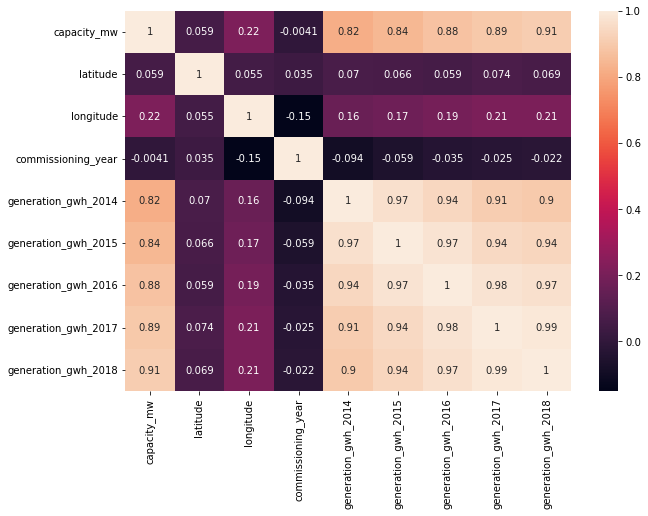

In [29]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_need_to_impute.corr(),annot=True)

In [30]:
df_need_to_impute.select_dtypes(exclude=['int64']).columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [31]:
category = ['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source']
lab = LabelEncoder()
for i in category:
    df_need_to_impute[i] = lab.fit_transform(df_need_to_impute[i])

print(df_need_to_impute.dtypes)

capacity_mw               int64
latitude                  int64
longitude                 int64
primary_fuel              int32
other_fuel1               int32
commissioning_year        int64
owner                     int32
source                    int32
url                       int32
geolocation_source        int32
generation_gwh_2014       int64
generation_gwh_2015       int64
generation_gwh_2016       int64
generation_gwh_2017       int64
generation_gwh_2018       int64
generation_data_source    int32
dtype: object


In [83]:
z = np.abs(zscore(df_need_to_impute))
print(z)

     capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0    1.372954     1.355716  1.023259   1.225688      0.054303      
1    0.192321     0.778292  0.651179   0.967877      0.054303      
2    0.329438     0.044922  1.575247   1.664401      0.054303      
3    0.406614     0.580198  1.683526   0.529164      0.054303      
4    1.711010     0.057566  1.258291   0.967877      0.054303      
5    0.704762     0.550695  1.607958   0.967877      0.054303      
6    0.096510     1.506114  0.150226   0.090451      0.054303      
7    0.565005     1.684468  0.268801   0.090451      0.054303      
8    0.760665     0.966623  0.225943   0.090451      0.054303      
9    0.620908     0.335741  1.164249   0.967877      0.054303      
10   1.580571     0.182676  0.599994   0.967877      0.054303      
11   0.397297     1.600173  0.029681   0.090451      0.054303      
12   1.515351     0.656064  1.356422   0.967877      0.054303      
13   0.925733     1.583314  0.595905   0.090451 

In [84]:
threshold = 3
print(np.where(z<3))
print(df_need_to_impute.shape)

(array([  0,   0,   0, ..., 906, 906, 906], dtype=int64), array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))
(907, 16)


In [85]:
X = df_need_to_impute.drop(['primary_fuel'],axis=1)
y = df_need_to_impute['primary_fuel']

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [88]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)

In [89]:
ROS.fit(X,y)

RandomOverSampler(random_state=42)

In [90]:
X_ros, Y_ros= ROS.fit_resample(X, y)

In [91]:
Y_ros.value_counts(normalize=True)

6    0.125
1    0.125
7    0.125
2    0.125
3    0.125
0    0.125
5    0.125
4    0.125
Name: primary_fuel, dtype: float64

In [92]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.5909295192189663
R2 score for the random state is 42 is 0.9280734041683574
R2 score for the random state is 42 is 0.7685822995434667
R2 score for the random state is 42 is 0.9548091414901748
R2 score for the random state is 42 is 0.9276140312226062
R2 score for the random state is 42 is 0.9792355201143932
R2 score for the random state is 42 is 0.9702305651326322
R2 score for the random state is 43 is 0.6097272030621377
R2 score for the random state is 43 is 0.9287416982456353
R2 score for the random state is 43 is 0.7839396264859728
R2 score for the random state is 43 is 0.9567975451883741
R2 score for the random state is 43 is 0.9272240247879892
R2 score for the random state is 43 is 0.9826307986626243
R2 score for the random state is 43 is 0.971191278256327
R2 score for the random state is 44 is 0.6229188873643867
R2 score for the random state is 44 is 0.936067412589652
R2 score for the random state is 44 is 0.7921789043113026
R2 score for the

R2 score for the random state is 62 is 0.9792110251967622
R2 score for the random state is 62 is 0.969474760944681
R2 score for the random state is 63 is 0.5835848405582138
R2 score for the random state is 63 is 0.931671398818503
R2 score for the random state is 63 is 0.8039085661066758
R2 score for the random state is 63 is 0.9448204238662005
R2 score for the random state is 63 is 0.9281556079629345
R2 score for the random state is 63 is 0.9791239313981797
R2 score for the random state is 63 is 0.9705571416279212
R2 score for the random state is 64 is 0.6255150904920292
R2 score for the random state is 64 is 0.9408791008333911
R2 score for the random state is 64 is 0.785041180538028
R2 score for the random state is 64 is 0.961718705214683
R2 score for the random state is 64 is 0.9349598086612017
R2 score for the random state is 64 is 0.9845508911680966
R2 score for the random state is 64 is 0.9795606664692131
R2 score for the random state is 65 is 0.5891851569323779
R2 score for the r

R2 score for the random state is 83 is 0.9372311872813923
R2 score for the random state is 83 is 0.7809693344332882
R2 score for the random state is 83 is 0.960212307642096
R2 score for the random state is 83 is 0.9487712593221169
R2 score for the random state is 83 is 0.9795581409618304
R2 score for the random state is 83 is 0.9724934883891708
R2 score for the random state is 84 is 0.6239237914658282
R2 score for the random state is 84 is 0.9329050916048999
R2 score for the random state is 84 is 0.8056784167189859
R2 score for the random state is 84 is 0.9745836460423429
R2 score for the random state is 84 is 0.9338958487705531
R2 score for the random state is 84 is 0.9833067820686806
R2 score for the random state is 84 is 0.9799226486165674
R2 score for the random state is 85 is 0.6308360281904813
R2 score for the random state is 85 is 0.9368165854284596
R2 score for the random state is 85 is 0.7987496162722287
R2 score for the random state is 85 is 0.9567498620987552
R2 score for th

In [93]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [94]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [95]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=51,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=51, verbose=2)

In [96]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 1000}

In [97]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=1000, max_features='auto', n_estimators=800)

In [98]:
ETR = ExtraTreesRegressor(n_estimators=800,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=1000,random_state=51)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 98.6767099931494


In [99]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.08554802052785923
Mean squared Error:  0.07046541193181817
Root Mean Absolute Error:  0.2924859321879588


Text(0, 0.5, 'Predicted_Y')

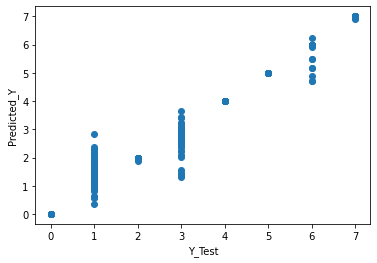

In [100]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [101]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [102]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.9369501466275659
accuracy score correspond to random state  40 is 0.8812316715542522
accuracy score correspond to random state  41 is 0.9340175953079178
accuracy score correspond to random state  41 is 0.8812316715542522
accuracy score correspond to random state  42 is 0.9310850439882697
accuracy score correspond to random state  42 is 0.8900293255131965
accuracy score correspond to random state  43 is 0.9442815249266863
accuracy score correspond to random state  43 is 0.8870967741935484
accuracy score correspond to random state  44 is 0.9296187683284457
accuracy score correspond to random state  44 is 0.8856304985337243
accuracy score correspond to random state  45 is 0.9266862170087976
accuracy score correspond to random state  45 is 0.8607038123167156
accuracy score correspond to random state  46 is 0.9310850439882697
accuracy score correspond to random state  46 is 0.8563049853372434
accuracy score correspond to random state  47 is

In [103]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [104]:
dec = DecisionTreeClassifier(random_state=64)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [105]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=64), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [106]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=64)

In [107]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [108]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=20, min_samples_leaf=5, random_state=64)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 91.0557184750733


In [109]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [110]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

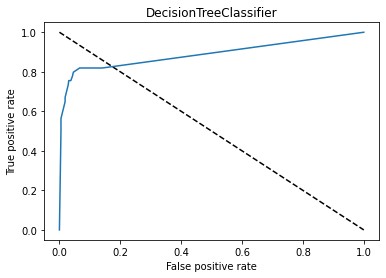

In [111]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [112]:
confusion_matrix(y_test, predc)

array([[71,  0,  0,  0,  0,  0,  0,  0],
       [ 7, 71,  8,  2,  3,  3,  0,  0],
       [ 0,  7, 77,  1,  0,  4,  0,  0],
       [ 0, 12,  9, 69,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 82,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 80,  0,  0],
       [ 2,  0,  0,  0,  0,  1, 82,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 89]], dtype=int64)

[Text(0.30353307560137455, 0.96875, 'X[8] <= -0.345\ngini = 0.875\nsamples = 1382\nvalue = [187, 164, 169, 166, 176, 178, 173, 169]'),
 Text(0.28978737113402064, 0.90625, 'gini = 0.0\nsamples = 170\nvalue = [0, 0, 0, 0, 0, 0, 170, 0]'),
 Text(0.3172787800687285, 0.90625, 'X[6] <= -0.501\ngini = 0.858\nsamples = 1212\nvalue = [187, 164, 169, 166, 176, 178, 3, 169]'),
 Text(0.041237113402061855, 0.84375, 'X[6] <= -0.523\ngini = 0.244\nsamples = 195\nvalue = [6, 8, 2, 0, 0, 10, 0, 169]'),
 Text(0.027491408934707903, 0.78125, 'X[2] <= -1.105\ngini = 0.698\nsamples = 26\nvalue = [6, 8, 2, 0, 0, 10, 0, 0]'),
 Text(0.013745704467353952, 0.71875, 'gini = 0.278\nsamples = 12\nvalue = [0, 0, 2, 0, 0, 10, 0, 0]'),
 Text(0.041237113402061855, 0.71875, 'X[7] <= -0.611\ngini = 0.49\nsamples = 14\nvalue = [6, 8, 0, 0, 0, 0, 0, 0]'),
 Text(0.027491408934707903, 0.65625, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0, 0, 0, 0]'),
 Text(0.054982817869415807, 0.65625, 'gini = 0.0\nsamples = 6\nvalue = 

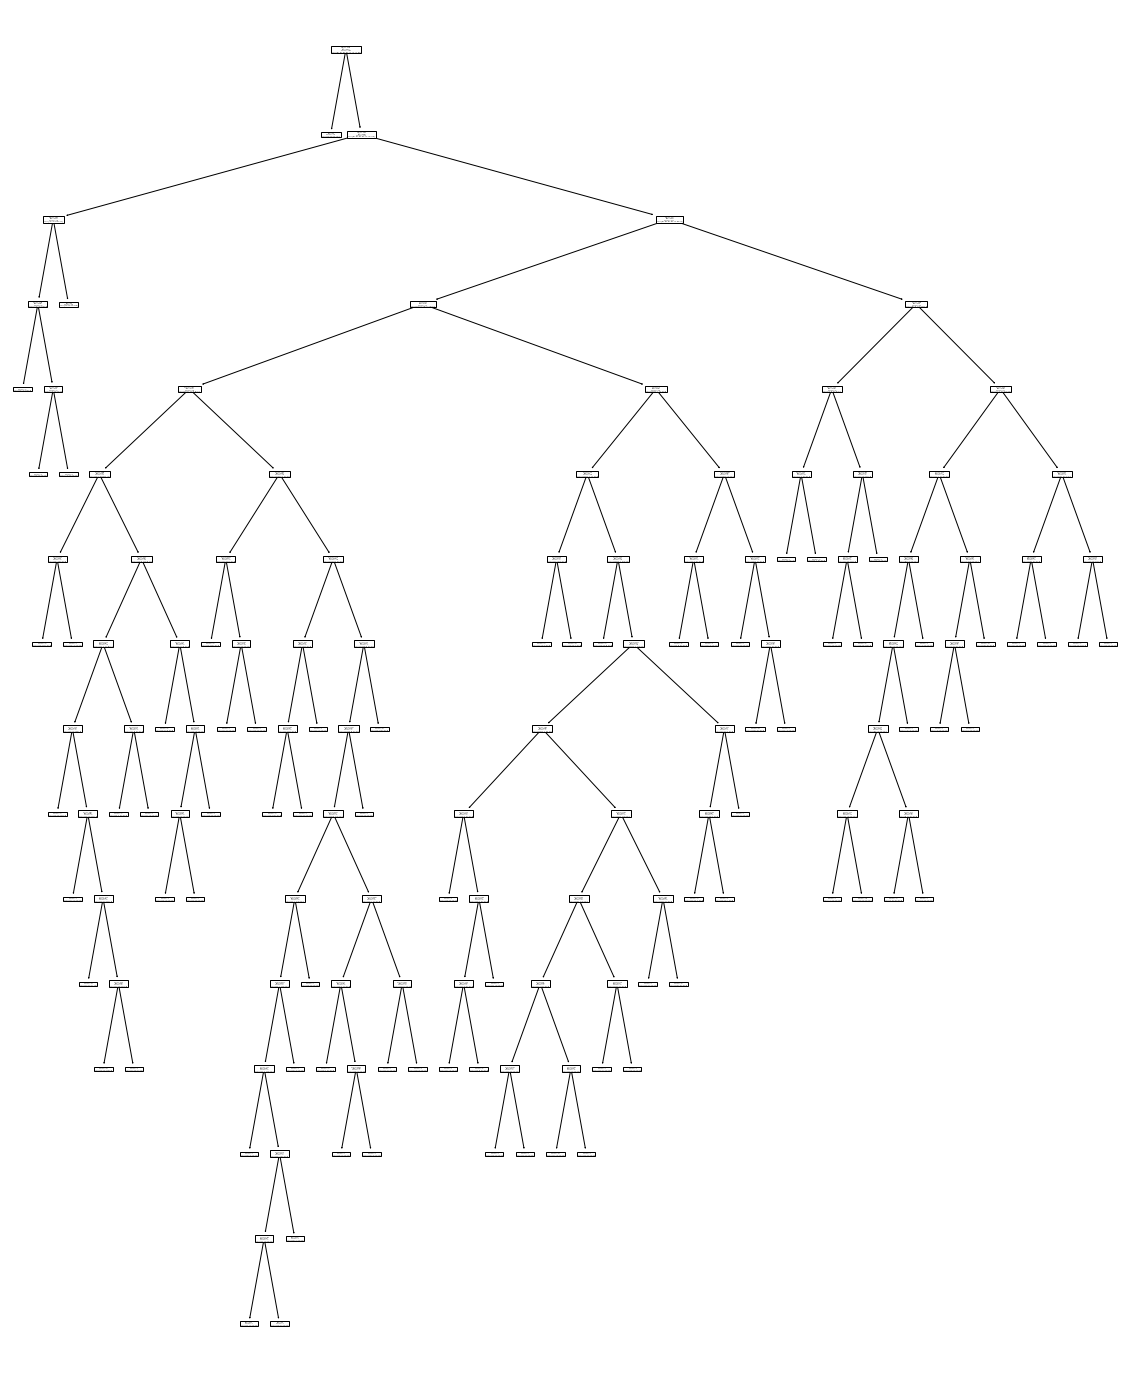

In [113]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 12345)

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1444, 15), (620, 15), (1444,), (620,))

In [116]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [117]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
accuracy

0.7435483870967742

In [118]:
from sklearn.model_selection import RepeatedStratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 12345)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [119]:
grid_result.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [120]:
grid_result.best_estimator_

LogisticRegression(C=100, solver='newton-cg')

In [121]:
LR = LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')
LR.fit(X_train,y_train)
predc = LR.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 77.41935483870968


In [122]:
df_need_to_impute.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [126]:
z = np.abs(zscore(df_need_to_impute))
print(z)

     capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0    1.372954     1.355716  1.023259   1.225688      0.054303      
1    0.192321     0.778292  0.651179   0.967877      0.054303      
2    0.329438     0.044922  1.575247   1.664401      0.054303      
3    0.406614     0.580198  1.683526   0.529164      0.054303      
4    1.711010     0.057566  1.258291   0.967877      0.054303      
5    0.704762     0.550695  1.607958   0.967877      0.054303      
6    0.096510     1.506114  0.150226   0.090451      0.054303      
7    0.565005     1.684468  0.268801   0.090451      0.054303      
8    0.760665     0.966623  0.225943   0.090451      0.054303      
9    0.620908     0.335741  1.164249   0.967877      0.054303      
10   1.580571     0.182676  0.599994   0.967877      0.054303      
11   0.397297     1.600173  0.029681   0.090451      0.054303      
12   1.515351     0.656064  1.356422   0.967877      0.054303      
13   0.925733     1.583314  0.595905   0.090451 

In [127]:
threshold = 3
print(np.where(z<3))
print(df_need_to_impute.shape)

(array([  0,   0,   0, ..., 906, 906, 906], dtype=int64), array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))
(907, 16)


In [128]:
X = df_need_to_impute.drop(['capacity_mw'],axis=1)
y = df_need_to_impute['capacity_mw']

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [131]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)

In [132]:
ROS.fit(X,y)

RandomOverSampler(random_state=42)

In [133]:
X_ros, Y_ros= ROS.fit_resample(X, y)

In [134]:
Y_ros.value_counts(normalize=True)

9      0.00277
23     0.00277
105    0.00277
333    0.00277
43     0.00277
41     0.00277
209    0.00277
153    0.00277
130    0.00277
299    0.00277
139    0.00277
25     0.00277
50     0.00277
281    0.00277
91     0.00277
358    0.00277
359    0.00277
98     0.00277
222    0.00277
166    0.00277
32     0.00277
88     0.00277
118    0.00277
218    0.00277
21     0.00277
145    0.00277
305    0.00277
328    0.00277
256    0.00277
290    0.00277
208    0.00277
207    0.00277
225    0.00277
68     0.00277
318    0.00277
316    0.00277
213    0.00277
293    0.00277
286    0.00277
245    0.00277
183    0.00277
275    0.00277
313    0.00277
26     0.00277
231    0.00277
301    0.00277
96     0.00277
129    0.00277
164    0.00277
182    0.00277
345    0.00277
277    0.00277
342    0.00277
188    0.00277
321    0.00277
325    0.00277
304    0.00277
351    0.00277
349    0.00277
220    0.00277
332    0.00277
266    0.00277
60     0.00277
322    0.00277
124    0.00277
161    0.00277
283    0.0

In [135]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.7513741241877107
R2 score for the random state is 42 is 0.9192130809851585
R2 score for the random state is 42 is 0.8062883856738575
R2 score for the random state is 42 is 0.9965086266115619
R2 score for the random state is 42 is 0.9884827514828445
R2 score for the random state is 42 is 0.9977795026148334
R2 score for the random state is 42 is 0.9967230564714272
R2 score for the random state is 43 is 0.7514333767852346
R2 score for the random state is 43 is 0.9172081497574108
R2 score for the random state is 43 is 0.8074882427408788
R2 score for the random state is 43 is 0.9963873606781768
R2 score for the random state is 43 is 0.9916505946831851
R2 score for the random state is 43 is 0.9980314546221932
R2 score for the random state is 43 is 0.9968545299587868
R2 score for the random state is 44 is 0.7530402043178771
R2 score for the random state is 44 is 0.9151035112367671
R2 score for the random state is 44 is 0.8005530999831529
R2 score for t

R2 score for the random state is 62 is 0.8006257239326451
R2 score for the random state is 62 is 0.9938602482612058
R2 score for the random state is 62 is 0.9883399680030746
R2 score for the random state is 62 is 0.9971407817463777
R2 score for the random state is 62 is 0.9958483179548674
R2 score for the random state is 63 is 0.7496954871270306
R2 score for the random state is 63 is 0.9124713318835421
R2 score for the random state is 63 is 0.8047834649615422
R2 score for the random state is 63 is 0.9900391242266701
R2 score for the random state is 63 is 0.985719241785026
R2 score for the random state is 63 is 0.996471679899968
R2 score for the random state is 63 is 0.9942678285178621
R2 score for the random state is 64 is 0.7520511563210075
R2 score for the random state is 64 is 0.917268118919289
R2 score for the random state is 64 is 0.7964617576162767
R2 score for the random state is 64 is 0.9949630512634479
R2 score for the random state is 64 is 0.9902742065985519
R2 score for the 

R2 score for the random state is 82 is 0.9905843002137726
R2 score for the random state is 82 is 0.9980718078617052
R2 score for the random state is 82 is 0.9968912606283226
R2 score for the random state is 83 is 0.7509492831213057
R2 score for the random state is 83 is 0.9150008286072601
R2 score for the random state is 83 is 0.7974178560401368
R2 score for the random state is 83 is 0.9976283153793324
R2 score for the random state is 83 is 0.9914966309935026
R2 score for the random state is 83 is 0.9984290986929814
R2 score for the random state is 83 is 0.9978246503451409
R2 score for the random state is 84 is 0.7468975938283391
R2 score for the random state is 84 is 0.9168764824171165
R2 score for the random state is 84 is 0.7946365292170939
R2 score for the random state is 84 is 0.9953388455858848
R2 score for the random state is 84 is 0.9896443374117482
R2 score for the random state is 84 is 0.9974724352300933
R2 score for the random state is 84 is 0.9965398166438132
R2 score for t

In [136]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [137]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [138]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=49,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=49, verbose=2)

In [139]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 890}

In [140]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=890, max_features='auto', n_estimators=800)

In [141]:
ETR = ExtraTreesRegressor(n_estimators=800,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=890,random_state=49)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 99.71816266923112


In [142]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.5600525965056863
Mean squared Error:  30.313682278861318
Root Mean Absolute Error:  0.7483666190482351


Text(0, 0.5, 'Predicted_Y')

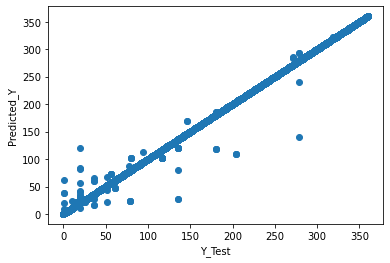

In [143]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [144]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [145]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.9875188293522703
accuracy score correspond to random state  40 is 0.9511512803959544
accuracy score correspond to random state  41 is 0.9855820959758984
accuracy score correspond to random state  41 is 0.9479233914353347
accuracy score correspond to random state  42 is 0.9860124811706478
accuracy score correspond to random state  42 is 0.9438347320852163
accuracy score correspond to random state  43 is 0.9817086292231547
accuracy score correspond to random state  43 is 0.947062621045836
accuracy score correspond to random state  44 is 0.9847213255863998
accuracy score correspond to random state  44 is 0.9455562728642135
accuracy score correspond to random state  45 is 0.986442866365397
accuracy score correspond to random state  45 is 0.9462018506563374
accuracy score correspond to random state  46 is 0.9834301700021519
accuracy score correspond to random state  46 is 0.9451258876694641
accuracy score correspond to random state  47 is 0

In [146]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [147]:
dec = DecisionTreeClassifier(random_state=69)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [148]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=69), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [149]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=69)

In [150]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [151]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_leaf=5, random_state=69)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 93.97460727350979


In [152]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [153]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

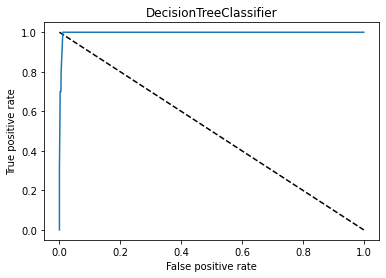

In [154]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [155]:
confusion_matrix(y_test, predc)

array([[17,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0, 14,  0],
       [ 0,  0,  0, ...,  0,  0, 12]], dtype=int64)

[Text(0.5629008234669095, 0.9642857142857143, 'X[13] <= 0.07\nentropy = 8.486\nsamples = 9432\nvalue = [22, 29, 31, 29, 27, 22, 22, 24, 26, 26, 26, 30\n27, 20, 30, 24, 28, 28, 28, 28, 27, 27, 29, 23\n24, 26, 28, 22, 23, 22, 30, 24, 25, 28, 29, 23\n25, 27, 22, 21, 29, 30, 27, 27, 25, 29, 26, 26\n21, 26, 25, 33, 34, 28, 24, 25, 26, 29, 24, 21\n23, 23, 27, 24, 25, 25, 24, 25, 26, 26, 25, 20\n33, 29, 27, 28, 23, 28, 26, 28, 24, 21, 23, 27\n22, 25, 28, 24, 27, 31, 26, 26, 28, 24, 23, 24\n31, 32, 22, 24, 19, 23, 30, 24, 30, 33, 27, 30\n28, 28, 29, 24, 27, 27, 24, 26, 26, 29, 22, 23\n24, 24, 26, 28, 24, 34, 22, 23, 28, 29, 25, 26\n22, 26, 25, 26, 24, 28, 27, 26, 26, 22, 24, 24\n25, 26, 28, 27, 28, 32, 30, 28, 30, 22, 29, 31\n25, 22, 24, 26, 23, 30, 28, 25, 22, 30, 19, 31\n25, 21, 23, 23, 28, 27, 27, 27, 27, 25, 21, 29\n28, 30, 27, 21, 25, 24, 28, 25, 24, 25, 31, 29\n22, 21, 29, 28, 23, 29, 29, 22, 32, 26, 24, 26\n26, 28, 30, 27, 24, 27, 28, 29, 28, 24, 30, 27\n26, 25, 29, 24, 30, 28, 22, 23, 

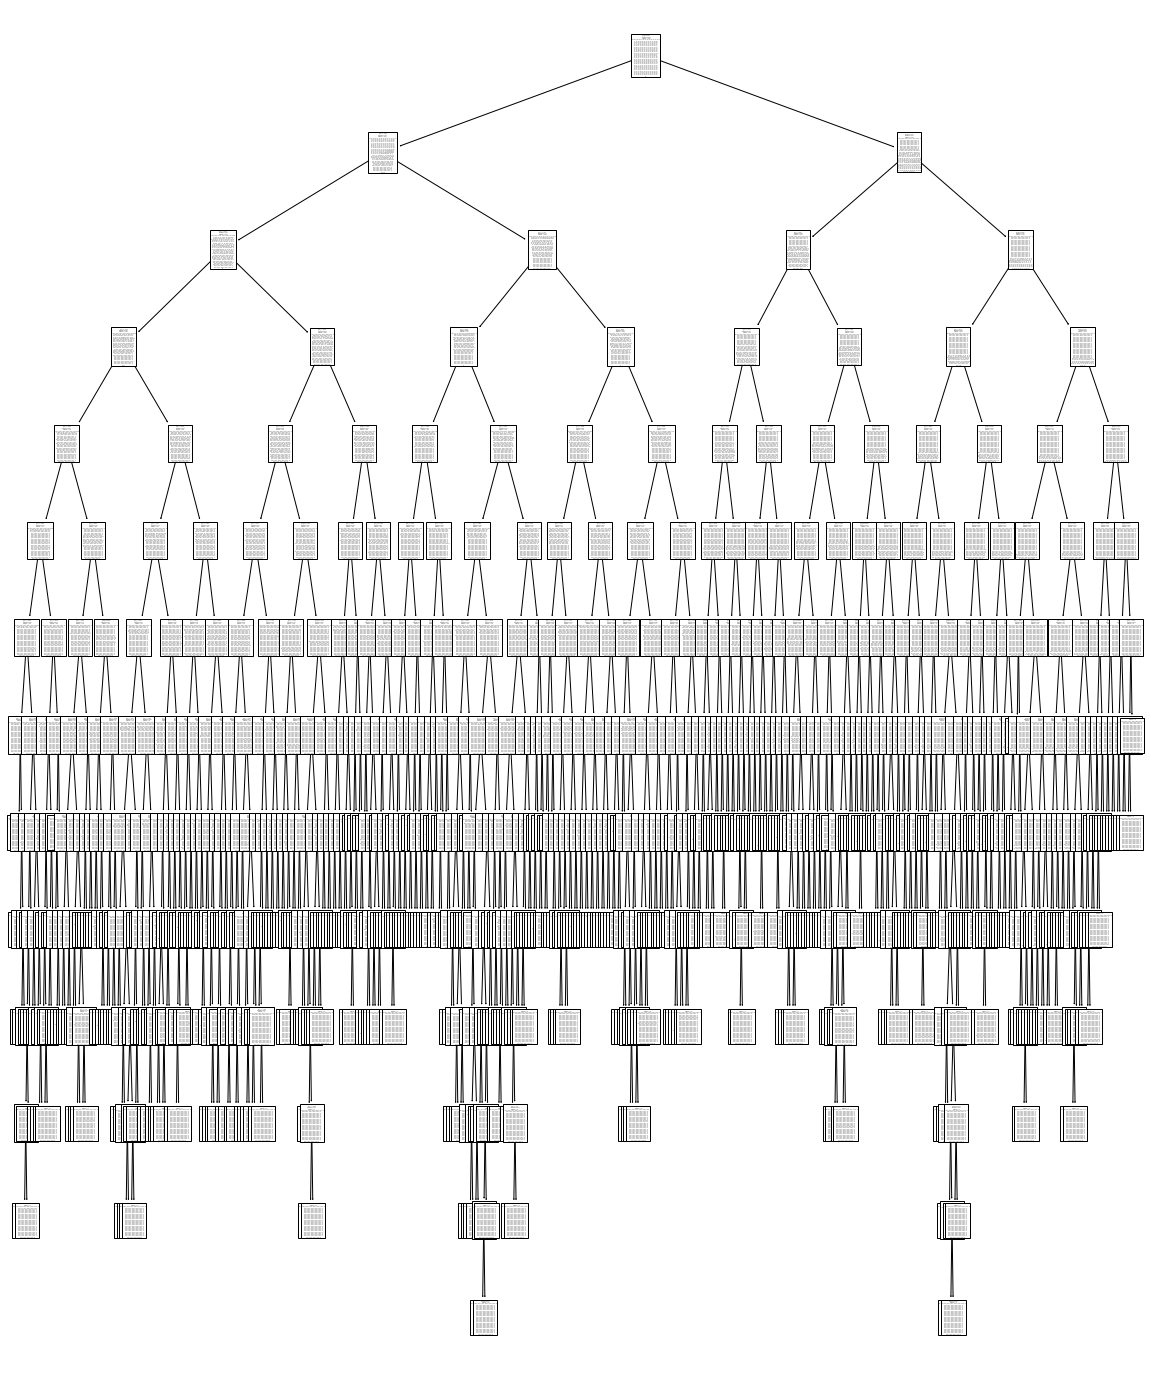

In [156]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 12345)

In [158]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9855, 15), (4224, 15), (9855,), (4224,))

In [159]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [160]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
accuracy

0.6877367424242424

### Conclusion
This is about Global Power Plant Database dataset
This dataset contains 907 rows and 27 columns
Most of rows have null values,since most of them are categorical features, use modes
Some blank datas,names,those rows have been dropped
In this dataset, we have two target variables primary fuel and capacity mw.
From the charts, we can come to the following conclusions:
    
    HydroFuel & Coal was used mostly
    Nuclear and coal fuel has more capacity
    From the latitutudes and longitudes we find Oil,Biomass and Nuclear were available in low quantities
    The supplementary fuels are mostly oils
    Based on the no of years used,Hydro fuel stands first,coal stands next ,wind after coal,all other fuel types have come recently
    Central Electricity Authority have more source & Acc Acc Itd have more ownership
    Regarding the geolocation source, WRI have all types of fuels
    In 2014,2015,2016 -Coal generated more power
    Central Authority Source have all types of fuels
    Oil produced more power
    From the heatmap, we find capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 are highly corelated
    Since the target variable is not uniformly distributed

Case 1 : Primary Fuel is taken as target variable

The model is evaluated by using regression and classification algorithms

•    Of the regression algorithms:

•    ExtraTreesRegressorof random state 51 give more accuracy

•    So cross validation is done using GridSearchCV

•    From this we get the best parameters, final R2 Score is 98.67.

1.	Mean Absolute Error:  0.08184630573488898
2.	Mean squared Error:  0.01407825956108451
3.	Root Mean Absolute Error:  0.2860879335709372

The classifier algorithm is evaluated using the similar procedure

        1.    DecisionTreeClassifier gives more  91.055 accuracy and is cross validated.

        
Case 2 : Capacity mw is taken as target variable

The model is evaluated by using regression and classification algorithms

•    Of the regression algorithms:

•    ExtraTreesRegressorof random state 51 give more accuracy

•    So cross validation is done using GridSearchCV

•    From this we get the best parameters, final R2 Score is 99.71.

            1. Mean Absolute Error:  0.5600525965056863
            2. Mean squared Error:  30.313682278861318
            3. Root Mean Absolute Error:  0.7483666190482351

The classifier algorithm is evaluated using the similar procedure

                1.    DecisionTreeClassifier gives more  93.97 accuracy and is cross validated.
    
Thus, we conclude that decision tree ExtraTreesRegressor algorithm for both cases gives the maximum accuracy of  the Primary fuel 98 % & Capacity mw 99.71%  can be predicted by this algorithm